In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!tar -xvzf cifar-100-python.tar.gz

cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


In [3]:
train_file = "cifar-100-python/train"
test_file = "cifar-100-python/test"
meta_file = "cifar-100-python/meta"

In [4]:
with open(train_file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
    data = dict[b'data']
    coarse_labels = np.array(dict[b'coarse_labels']).reshape(-1, 1)
    fine_labels = np.array(dict[b'fine_labels']).reshape(-1, 1)
    del dict
coarse_train = np.append(coarse_labels, data, axis=1)
fine_train = np.append(fine_labels, data, axis=1)
print(coarse_train.shape)
print(fine_train.shape)
coarse_train = pd.DataFrame(coarse_train)
coarse_train.to_csv("coarse_train.csv", index=False, header=False)
fine_train = pd.DataFrame(fine_train)
fine_train.to_csv("fine_train.csv", index=False, header=False)
del coarse_train, fine_train, coarse_labels, fine_labels, data

(50000, 3073)
(50000, 3073)


In [5]:
with open(test_file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
    data = dict[b'data']
    coarse_labels = np.array(dict[b'coarse_labels']).reshape(-1, 1)
    fine_labels = np.array(dict[b'fine_labels']).reshape(-1, 1)
    del dict
coarse_test = np.append(coarse_labels, data, axis=1)
fine_test = np.append(fine_labels, data, axis=1)
print(coarse_test.shape)
print(fine_test.shape)
coarse_test = pd.DataFrame(coarse_test)
coarse_test.to_csv("coarse_test.csv", index=False, header=False)
fine_test = pd.DataFrame(fine_test)
fine_test.to_csv("fine_test.csv", index=False, header=False)
del coarse_test, fine_test, coarse_labels, fine_labels, data

(10000, 3073)
(10000, 3073)


b'altar_boy_s_001435.png'


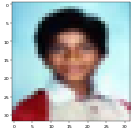

In [6]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

a = unpickle(train_file)
i = 3  # which image you want to see
print(a[b"filenames"][i])
image = a[b"data"][i].reshape(3, 32, 32).transpose(1, 2, 0)
image.shape
# reduce the dpi
plt.figure(dpi=32)
plt.imshow(image)

In [7]:
with open(meta_file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
dict.keys()

dict_keys([b'fine_label_names', b'coarse_label_names'])

In [8]:
!rm -rf cifar-100-python